# Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.compat import lzip
from collections import Counter



In [2]:
pd.set_option('max_rows',10000)
pd.set_option('max_columns',10000)

# Read data

In [3]:
#importing dataset
df=pd.read_excel('train_fashion.xlsx')
df.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date,Order_Repeat_Chance
0,98981,2016-09-10,2016-09-11,897,l,grey,33,19.9,48040,Mrs,1960-05-30,Hamburg,2015-02-17,0
1,69825,2016-08-15,2016-08-20,1557,xl,petrol,31,89.9,42892,Mrs,1958-09-23,Lower Saxony,2015-11-14,1
2,9929,2016-06-27,2016-07-02,292,4+,grey,4,64.9,32479,Mrs,1961-09-19,Hesse,2016-06-28,0
3,75600,2016-08-21,2016-08-22,1445,xxl,grey,29,59.9,4216,Mrs,1952-10-01,Lower Saxony,2015-02-17,0
4,95622,2016-09-06,2016-09-07,1415,m,mahagoni,3,21.9,39571,Mrs,1963-10-30,North Rhine-Westphalia,2015-10-02,0


# Understand Data

In [4]:
df.dtypes

Order_Ref_Number                int64
Order_Placed_AT                object
Order_Delivered_Date           object
Product_Ref_ID                  int64
Size                           object
Color_Code                     object
Product_Category_Reference      int64
Cost_to_Customer(USD)         float64
Customer_ID                     int64
Gender                         object
Customer_BirthDate             object
Customer_Location              object
Customer_Joining_Date          object
Order_Repeat_Chance             int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_Ref_Number            75000 non-null  int64  
 1   Order_Placed_AT             75000 non-null  object 
 2   Order_Delivered_Date        67979 non-null  object 
 3   Product_Ref_ID              75000 non-null  int64  
 4   Size                        75000 non-null  object 
 5   Color_Code                  75000 non-null  object 
 6   Product_Category_Reference  75000 non-null  int64  
 7   Cost_to_Customer(USD)       75000 non-null  float64
 8   Customer_ID                 75000 non-null  int64  
 9   Gender                      75000 non-null  object 
 10  Customer_BirthDate          68445 non-null  object 
 11  Customer_Location           75000 non-null  object 
 12  Customer_Joining_Date       75000 non-null  object 
 13  Order_Repeat_Chance         750

# EDA

In [6]:
# checking datatypes, no. of unique values, and missing values in the dataset
# created a new dataframe and watching above all in the same frame
a=pd.concat([df.dtypes,df.nunique(),df.isnull().sum()],axis=1)
a.columns=['Dtypes','No. of unique values','Sum of Null values']
a

,Dtypes,No. of unique values,Sum of Null values
Order_Ref_Number,int64,75000,0
Order_Placed_AT,object,82,0
Order_Delivered_Date,object,121,7021
Product_Ref_ID,int64,1897,0
Size,object,99,0
Color_Code,object,77,0
Product_Category_Reference,int64,133,0
Cost_to_Customer(USD),float64,247,0
Customer_ID,int64,18017,0
Gender,object,5,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_Ref_Number,75000.0,50002.922613,28883.591717,1.0,24976.75,50042.5,75038.25,99999.0
Product_Ref_ID,75000.0,924.275213,702.739285,1.0,214.00,812.0,1582.00,2241.0
Product_Category_Reference,75000.0,30.173093,28.190524,1.0,5.00,25.0,44.00,138.0
Cost_to_Customer(USD),75000.0,65.232934,48.291431,0.0,29.90,49.9,79.90,999.0
Customer_ID,75000.0,27164.660547,14043.973668,9.0,14943.00,31185.0,38924.00,48241.0
Order_Repeat_Chance,75000.0,0.459933,0.498395,0.0,0.00,0.0,1.00,1.0


In [8]:
#checking for if any feature having insignificant values like punctuations....
for i in df.columns:
    if df[i].dtypes=='object' and len(df[i].unique()) < 15:
        print(str(i).upper())
        print(df[i].value_counts())
    else:
        print(i)
        print(df[i].unique())

Order_Ref_Number
[98981 69825  9929 ... 76821   861 15796]
Order_Placed_AT
['2016-09-10' '2016-08-15' '2016-06-27' '2016-08-21' '2016-09-06'
 '2016-08-25' '2016-08-23' '2016-06-29' '2016-08-24' '2016-08-27'
 '2016-08-01' '2016-09-08' '2016-07-06' '2016-06-24' '2016-08-03'
 '2016-06-23' '2016-06-26' '2016-07-27' '2016-07-02' '2016-08-14'
 '2016-08-06' '2016-07-14' '2016-09-04' '2016-07-22' '2016-08-18'
 '2016-06-28' '2016-08-28' '2016-07-03' '2016-08-19' '2016-07-12'
 '2016-08-09' '2016-08-20' '2016-08-02' '2016-08-29' '2016-08-13'
 '2016-08-26' '2016-07-20' '2016-07-10' '2016-07-28' '2016-07-21'
 '2016-09-07' '2016-09-11' '2016-07-08' '2016-08-30' '2016-08-22'
 '2016-08-16' '2016-07-01' '2016-07-04' '2016-08-12' '2016-07-23'
 '2016-09-05' '2016-07-11' '2016-08-08' '2016-08-05' '2016-08-17'
 '2016-09-02' '2016-09-03' '2016-08-31' '2016-06-30' '2016-08-11'
 '2016-08-07' '2016-07-30' '2016-07-07' '2016-09-09' '2016-07-15'
 '2016-08-10' '2016-07-05' '2016-08-04' '2016-07-13' '2016-06-25'
 

In [9]:
df.columns

Index(['Order_Ref_Number', 'Order_Placed_AT', 'Order_Delivered_Date',
       'Product_Ref_ID', 'Size', 'Color_Code', 'Product_Category_Reference',
       'Cost_to_Customer(USD)', 'Customer_ID', 'Gender', 'Customer_BirthDate',
       'Customer_Location', 'Customer_Joining_Date', 'Order_Repeat_Chance'],
      dtype='object')

In [10]:
# dropping Identifier
df.drop('Order_Ref_Number', axis=1, inplace = True)

In [11]:
df['Color_Code'] = df['Color_Code'].replace('?', df['Color_Code'].mode()[0])

# EDA

In [12]:
plt.rcParams['figure.figsize']=(11,7)

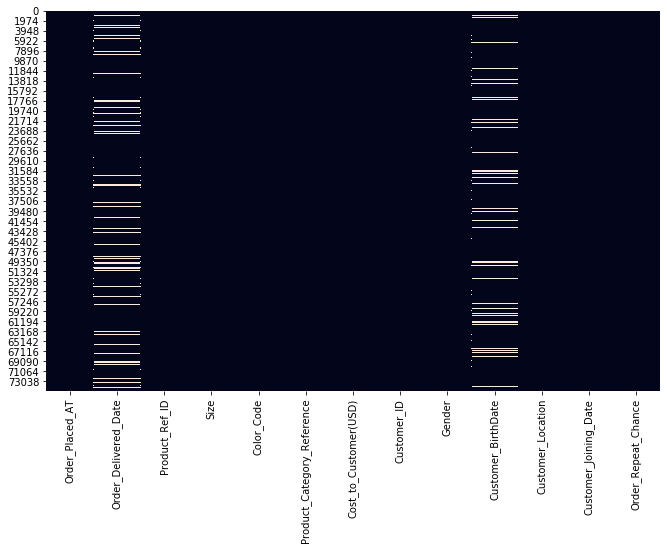

In [13]:
#Checking Null values
sns.heatmap(df.isnull(), cbar = False)

In [14]:
df.isnull().sum()

Order_Placed_AT                  0
Order_Delivered_Date          7021
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            6555
Customer_Location                0
Customer_Joining_Date            0
Order_Repeat_Chance              0
dtype: int64

In [15]:
df.isnull().sum()/df.shape[0]

Order_Placed_AT               0.000000
Order_Delivered_Date          0.093613
Product_Ref_ID                0.000000
Size                          0.000000
Color_Code                    0.000000
Product_Category_Reference    0.000000
Cost_to_Customer(USD)         0.000000
Customer_ID                   0.000000
Gender                        0.000000
Customer_BirthDate            0.087400
Customer_Location             0.000000
Customer_Joining_Date         0.000000
Order_Repeat_Chance           0.000000
dtype: float64

# TREATING NULL VALUES


##  Treating Order_Delivered_Date null values


In [16]:
from datetime import timedelta

In [17]:
df['Order_Placed_AT'] = pd.to_datetime(df['Order_Placed_AT'])

In [18]:
df['Order_Delivered_Date'] = pd.to_datetime(df['Order_Delivered_Date'])

In [19]:
# TOTAL NO OF DAYS FOR DELIVER PRODUCTS FROM Order_Delivered_Date and Order_Placed_AT
df['Total_days_for_deliver'] = (df['Order_Delivered_Date'] - df['Order_Placed_AT'])

In [20]:
df['Total_days_for_deliver'].isnull().sum()

7021

In [21]:
df['Total_days_for_deliver'] = df['Total_days_for_deliver']/np.timedelta64(1, 'D')

In [22]:
df['Total_days_for_deliver'] = df['Total_days_for_deliver'].fillna(0)

In [23]:
df['Total_days_for_deliver'] = df['Total_days_for_deliver'].apply(lambda x: 0.0 if x<0 else x)

In [24]:
df.drop(['Order_Delivered_Date','Order_Placed_AT'], axis=1,inplace = True)

# FEATURE ENGINEERING

# AGE FROM DOB

In [25]:
df['Customer_BirthDate'] = df['Customer_BirthDate'].fillna(df['Customer_BirthDate'].mode()[0])

In [26]:
df['year_BirthDate'] = df['Customer_BirthDate'].apply(lambda x: str(x).split('-')[0])


In [27]:
df['year_BirthDate'] = df['year_BirthDate'].astype(int)


In [28]:
df['age'] = 2020 - df['year_BirthDate']


In [29]:
df['age'].mode()


0    120
dtype: int32

In [30]:
df.drop('Customer_BirthDate', axis = 1, inplace = True)
df.drop('year_BirthDate', axis = 1, inplace = True)

## total no of days customer associated with the company from customer joining date


In [31]:
df['Customer_Joining_Date'] = pd.to_datetime(df['Customer_Joining_Date'])

In [32]:
a = pd.to_datetime('2020-01-30')

In [33]:
df['cust_asso'] = a - df['Customer_Joining_Date']

In [34]:
df['cust_asso'] = df['cust_asso'].apply(lambda x : str(x).split(' ')[0])

In [35]:
df['cust_asso'].head()

0    1808
1    1538
2    1311
3    1808
4    1581
Name: cust_asso, dtype: object

In [36]:
df['cust_asso'] = df['cust_asso'].astype(int)

In [37]:
df['cust_asso'].head()

0    1808
1    1538
2    1311
3    1808
4    1581
Name: cust_asso, dtype: int32

In [38]:
df.drop('Customer_Joining_Date', axis = 1, inplace = True)

In [39]:
df.drop('Customer_ID', axis = 1, inplace = True)

# checking correlation

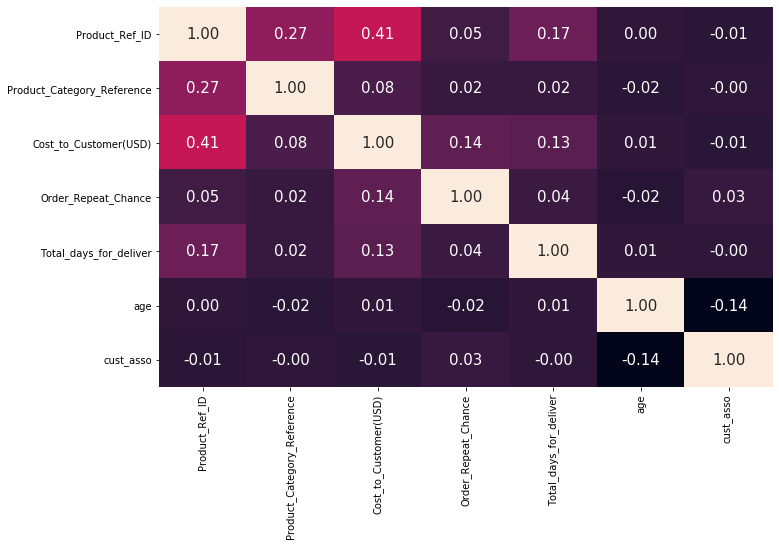

In [40]:
sns.heatmap(df.corr(), annot = True, annot_kws = {'size':15}, fmt = '.2f', cbar = False)

# Visualizing Target variable

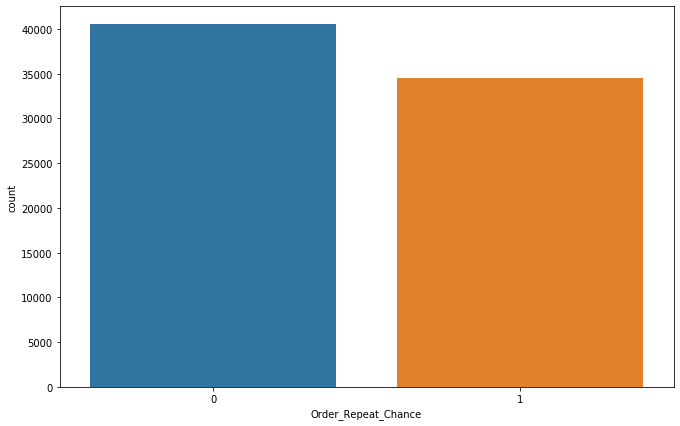

In [41]:
sns.countplot(df['Order_Repeat_Chance'])

### Comment:

- Given Binary classification problem Dataset is not imbalanced

# Visualizing Numerical Independent Variables

In [42]:
df_num = df.select_dtypes(np.number)

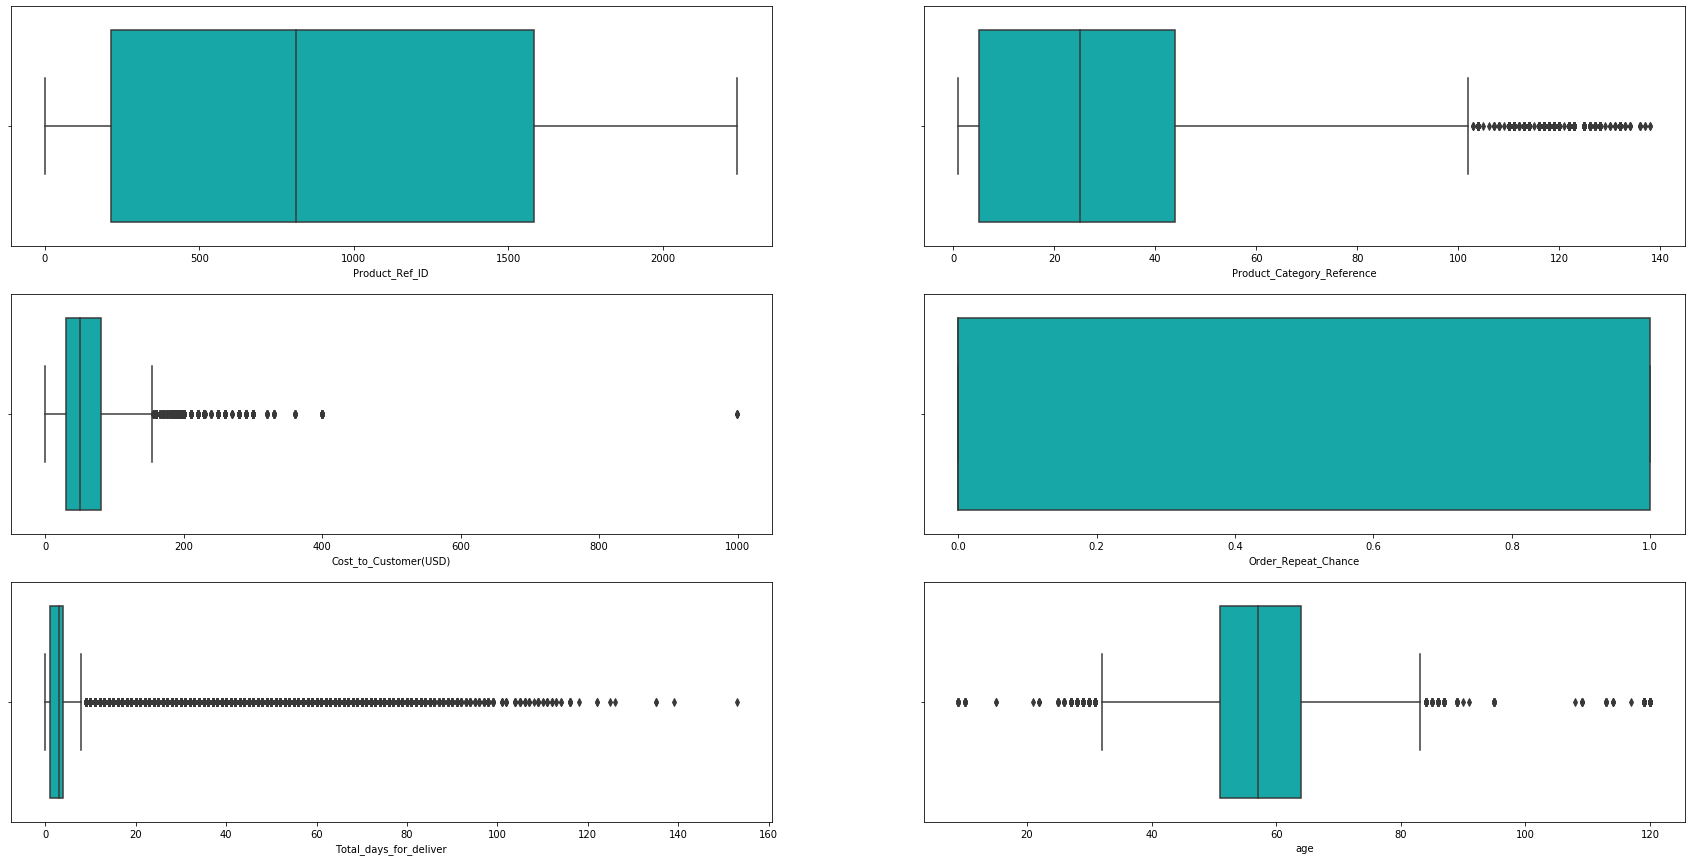

In [43]:
#visualising numerical features outliers
fig,ax=plt.subplots(nrows = 3, ncols = 2,figsize=(30,15))
for i,subplot in zip(list(df_num),ax.flatten()):
    sns.boxplot(df_num[i],color='c',ax=subplot)
plt.show()

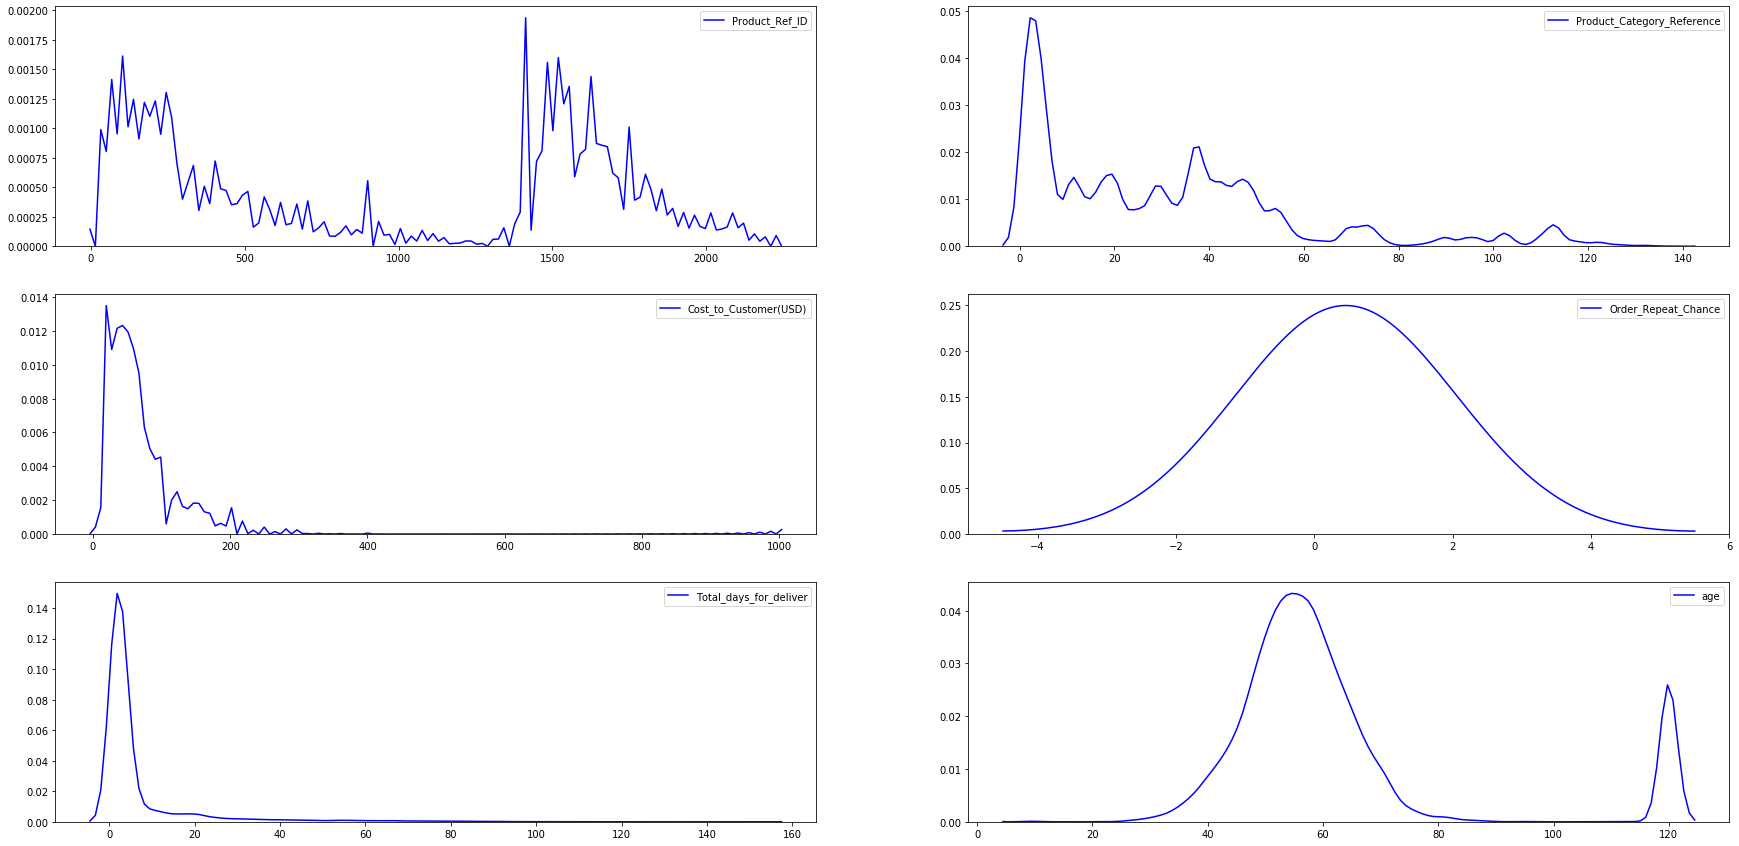

In [44]:
# distributions checking
fig,ax=plt.subplots(nrows = 3, ncols = 2,figsize=(30,15))
for i,subplot in zip(list(df_num),ax.flatten()):
    sns.kdeplot(df_num[i],bw=1.5,color='b',ax=subplot)
plt.show()

In [45]:
# handling datas for matching test data shape
df = df[(df['Color_Code']!='ebony') & (df['Color_Code']!='opal')]

In [46]:
df = df[(df['Size']!='14') & (df['Size']!='3132') & (df['Size']!='3634') & (df['Size']!='3834') 
               & (df['Size']!='4032') & (df['Size']!='4034') & (df['Size']!='58')]

In [47]:
#seperating numerical features
df_num=df.select_dtypes(np.number)
df_num.drop('Order_Repeat_Chance', axis = 1, inplace = True)
df_num.nunique()

Product_Ref_ID                1897
Product_Category_Reference     133
Cost_to_Customer(USD)          247
Total_days_for_deliver         121
age                             79
cust_asso                      572
dtype: int64

In [48]:
df['Size'] = df['Size'].replace('46+','49')
df['Size'] = df['Size'].replace('105','84')

In [49]:
df = df[(df['age']>20) & (df['age']<90)]
df.shape

(67426, 11)

In [50]:
df_num = df.select_dtypes(np.number)
df_num.drop('Order_Repeat_Chance', axis = 1, inplace = True)

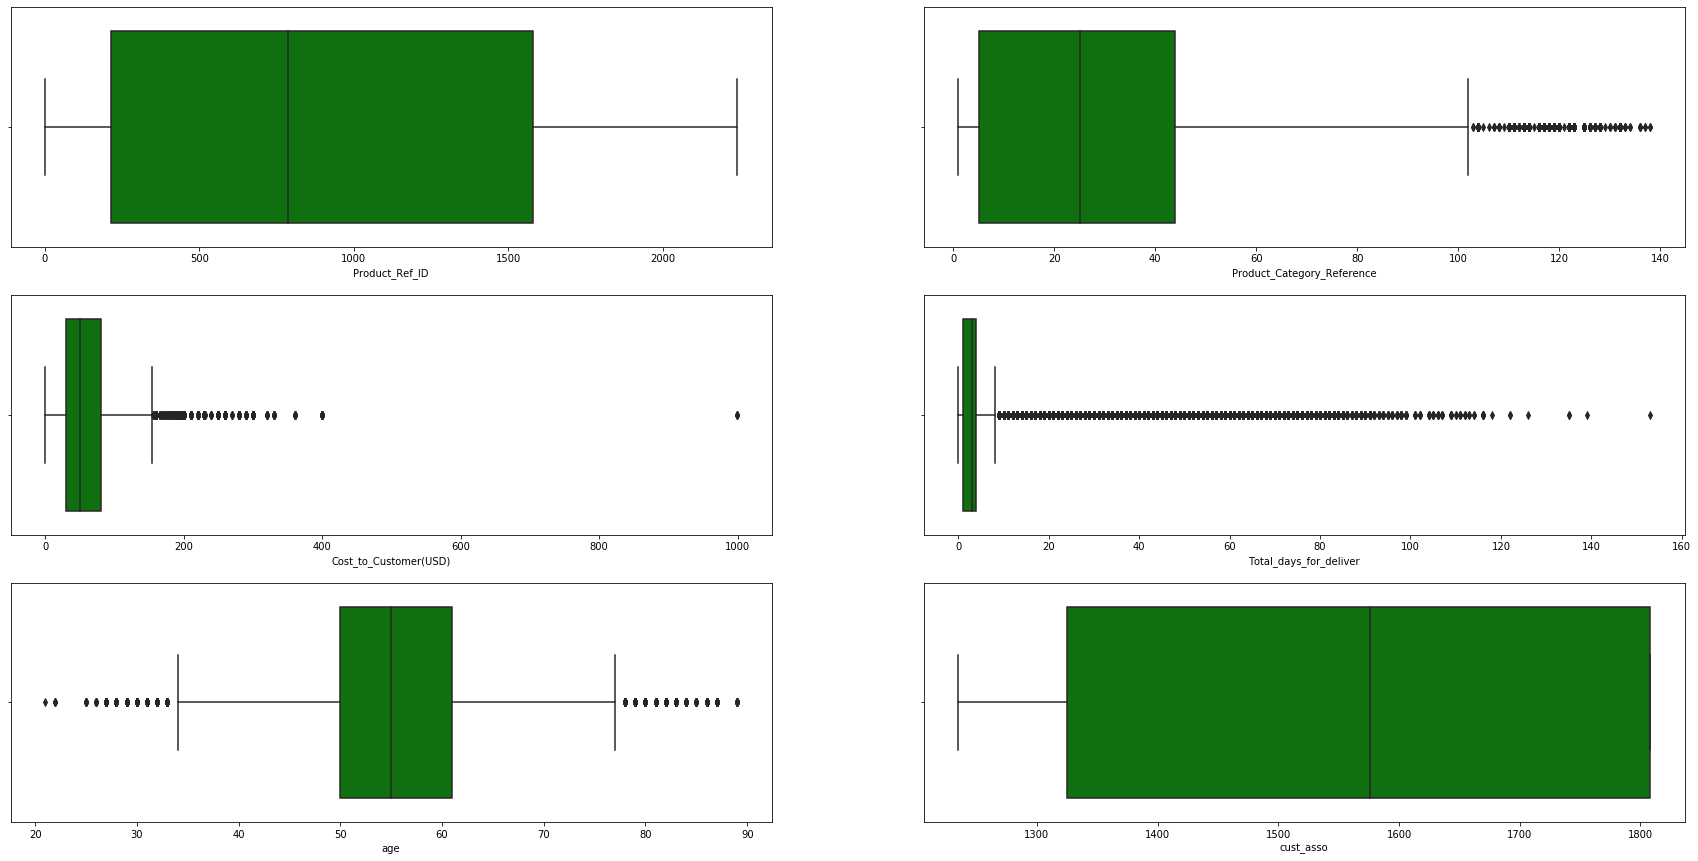

In [51]:
# after outliers
fig,ax=plt.subplots(nrows = 3, ncols = 2,figsize=(30,15))
for i,subplot in zip(list(df_num),ax.flatten()):
    sns.boxplot(df_num[i],color='g',ax=subplot)
plt.show()

In [52]:
# handling skewness
df_num[['Product_Ref_ID', 'Product_Category_Reference', 'Cost_to_Customer(USD)', 'Total_days_for_deliver']] = np.log1p(df_num[['Product_Ref_ID', 'Product_Category_Reference', 'Cost_to_Customer(USD)',
        'Total_days_for_deliver']])


In [53]:
df_num['cust_asso'] = np.sqrt(df_num['cust_asso'])

In [54]:
#seperating categorical values
df_cat=df.select_dtypes(include="object")
df_cat.nunique()

Size                 91
Color_Code           74
Gender                5
Customer_Location    16
dtype: int64

In [55]:
# A more robust way of figuring out correlations other than observations as above is to generate a full correlation
# table with the ranging from -1 to 1
df.corr().style.background_gradient(cmap='coolwarm')

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Order_Repeat_Chance,Total_days_for_deliver,age,cust_asso
Product_Ref_ID,1.000000,0.276051,0.407464,0.054381,0.168123,-0.045596,-0.008194
Product_Category_Reference,0.276051,1.000000,0.086561,0.024598,0.024215,-0.048659,-0.000820
Cost_to_Customer(USD),0.407464,0.086561,1.000000,0.141699,0.124645,-0.031149,-0.006955
Order_Repeat_Chance,0.054381,0.024598,0.141699,1.000000,0.034412,-0.049809,0.027919
Total_days_for_deliver,0.168123,0.024215,0.124645,0.034412,1.000000,-0.010588,0.001460
age,-0.045596,-0.048659,-0.031149,-0.049809,-0.010588,1.000000,0.088551
cust_asso,-0.008194,-0.000820,-0.006955,0.027919,0.001460,0.088551,1.000000


In [56]:
from sklearn.preprocessing import OrdinalEncoder
fit22 = OrdinalEncoder()
df_cat[df_cat.columns] = fit22.fit_transform(df_cat)

In [57]:
concat = pd.concat([df_num, df_cat], axis=1)
concat.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Total_days_for_deliver,age,cust_asso,Size,Color_Code,Gender,Customer_Location
0,6.800170,3.526361,3.039749,0.693147,60,42.520583,83.0,45.0,3.0,5.0
1,7.351158,3.465736,4.509760,1.791759,62,39.217343,87.0,63.0,3.0,7.0
2,5.680173,1.609438,4.188138,1.791759,59,36.207734,49.0,45.0,3.0,6.0
3,7.276556,3.401197,4.109233,0.693147,68,42.520583,89.0,45.0,3.0,7.0
4,7.255591,1.386294,3.131137,0.693147,57,39.761791,84.0,53.0,3.0,9.0


In [58]:
from sklearn.preprocessing import StandardScaler
fittt=StandardScaler()
concat[concat.columns]=fittt.fit_transform(concat)

In [59]:
x = concat
y = df['Order_Repeat_Chance']

In [60]:
x.shape

(67426, 10)

In [61]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)

print("The shape of y_train is:",y_train.shape)

print("The shape of y_test is:",y_test.shape)

<IPython.core.display.Javascript object>

The shape of X_train is: (47198, 10)
The shape of X_test is: (20228, 10)
The shape of y_train is: (47198,)
The shape of y_test is: (20228,)


# Building Models

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from datetime import datetime, timedelta

from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [66]:
#Building models and evaluating metrics

column = ['Model_name', 'Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
          'Kappa Score', 'f1-score', "confusion matrix", 'Sensitivity', 'Specificity']

result_tab = pd.DataFrame(columns=column)

models=[LogisticRegression(), AdaBoostClassifier(),  CatBoostClassifier(),
        RandomForestClassifier(), XGBClassifier(), ExtraTreesClassifier(), 
        GradientBoostingClassifier(), ]

def classify(model_name):
    for i in models:
        
        global result_tab
        
        print('----------',str(i).upper(),'--------')
        print()
        
        method=i
        method.fit(X_train,y_train)
        y_pred = method.predict(X_test)
       
        
        
        pred_prob1 = method.predict_proba(X_test)
        
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        print('Confusion Matrix \n', confusion_mat)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False positve rate (1- Specificity)')
        plt.ylabel('True positive rate (Sensitivity)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1[:,1]),
                    'Precision Score': metrics.precision_score(y_test, y_pred),
                    'Recall Score': metrics.recall_score(y_test, y_pred),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred),
                    "confusion matrix":confusion_matrix(y_pred,y_test),
                    'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab = result_tab.append(modd,ignore_index=True)
        
    return result_tab

---------- LOGISTICREGRESSION() --------

Confusion Matrix 
 [[7931 5469]
 [2957 3871]]
classification report:                  precision    recall  f1-score   support

           0       0.73      0.59      0.65     13400
           1       0.41      0.57      0.48      6828

    accuracy                           0.58     20228
   macro avg       0.57      0.58      0.57     20228
weighted avg       0.62      0.58      0.59     20228

PPV:  72.84166054371785
NPV:  41.44539614561028


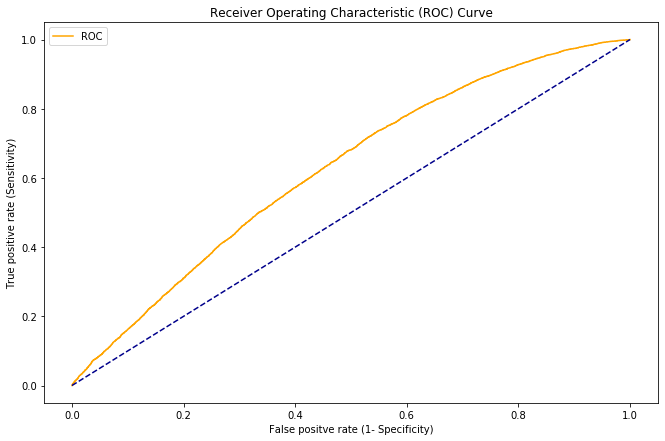


---------- ADABOOSTCLASSIFIER() --------

Confusion Matrix 
 [[6433 3161]
 [4455 6179]]
classification report:                  precision    recall  f1-score   support

           0       0.59      0.67      0.63      9594
           1       0.66      0.58      0.62     10634

    accuracy                           0.62     20228
   macro avg       0.63      0.63      0.62     20228
weighted avg       0.63      0.62      0.62     20228

PPV:  59.083394562821454
NPV:  66.15631691648822


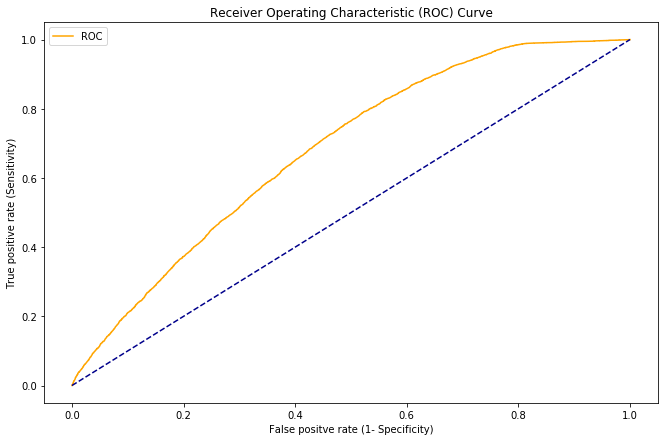


---------- <CATBOOST.CORE.CATBOOSTCLASSIFIER OBJECT AT 0X00000247DBB1A488> --------

Learning rate set to 0.053419
0:	learn: 0.6837894	total: 160ms	remaining: 2m 39s
1:	learn: 0.6757216	total: 207ms	remaining: 1m 43s
2:	learn: 0.6686320	total: 252ms	remaining: 1m 23s
3:	learn: 0.6625934	total: 299ms	remaining: 1m 14s
4:	learn: 0.6571870	total: 351ms	remaining: 1m 9s
5:	learn: 0.6524778	total: 395ms	remaining: 1m 5s
6:	learn: 0.6484638	total: 432ms	remaining: 1m 1s
7:	learn: 0.6450484	total: 477ms	remaining: 59.1s
8:	learn: 0.6417307	total: 534ms	remaining: 58.8s
9:	learn: 0.6388798	total: 579ms	remaining: 57.3s
10:	learn: 0.6363325	total: 636ms	remaining: 57.2s
11:	learn: 0.6342200	total: 665ms	remaining: 54.7s
12:	learn: 0.6323514	total: 691ms	remaining: 52.4s
13:	learn: 0.6307732	total: 750ms	remaining: 52.8s
14:	learn: 0.6292073	total: 777ms	remaining: 51s
15:	learn: 0.6279401	total: 803ms	remaining: 49.4s
16:	learn: 0.6266816	total: 868ms	remaining: 50.2s
17:	learn: 0.6255956	tota

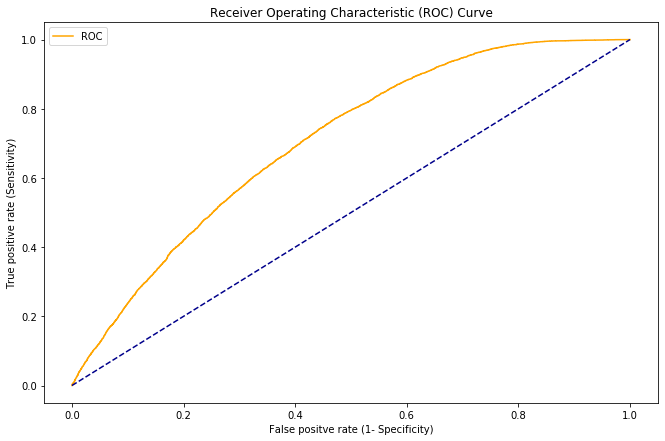


---------- RANDOMFORESTCLASSIFIER() --------

Confusion Matrix 
 [[7032 3460]
 [3856 5880]]
classification report:                  precision    recall  f1-score   support

           0       0.65      0.67      0.66     10492
           1       0.63      0.60      0.62      9736

    accuracy                           0.64     20228
   macro avg       0.64      0.64      0.64     20228
weighted avg       0.64      0.64      0.64     20228

PPV:  64.58486407053637
NPV:  62.95503211991435


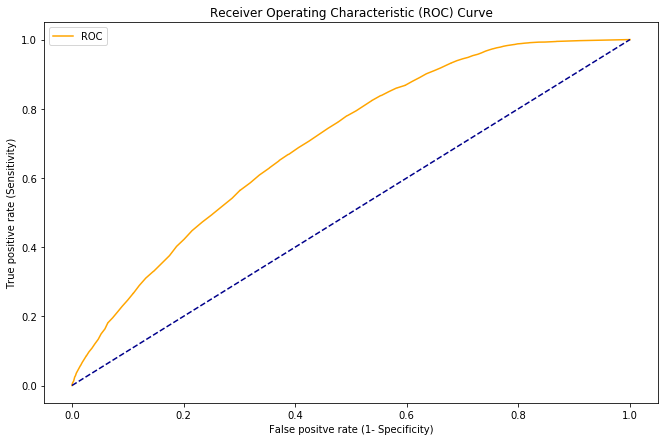


---------- XGBCLASSIFIER(BASE_SCORE=NONE, BOOSTER=NONE, COLSAMPLE_BYLEVEL=NONE,
              COLSAMPLE_BYNODE=NONE, COLSAMPLE_BYTREE=NONE, GAMMA=NONE,
              GPU_ID=NONE, IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=NONE, MAX_DELTA_STEP=NONE, MAX_DEPTH=NONE,
              MIN_CHILD_WEIGHT=NONE, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=NONE, NUM_PARALLEL_TREE=NONE,
              RANDOM_STATE=NONE, REG_ALPHA=NONE, REG_LAMBDA=NONE,
              SCALE_POS_WEIGHT=NONE, SUBSAMPLE=NONE, TREE_METHOD=NONE,
              VALIDATE_PARAMETERS=FALSE, VERBOSITY=NONE) --------

Confusion Matrix 
 [[6904 3251]
 [3984 6089]]
classification report:                  precision    recall  f1-score   support

           0       0.63      0.68      0.66     10155
           1       0.65      0.60      0.63     10073

    accuracy                           0.64     20228
   macro avg       0.64      0.64      0.64     20228
w

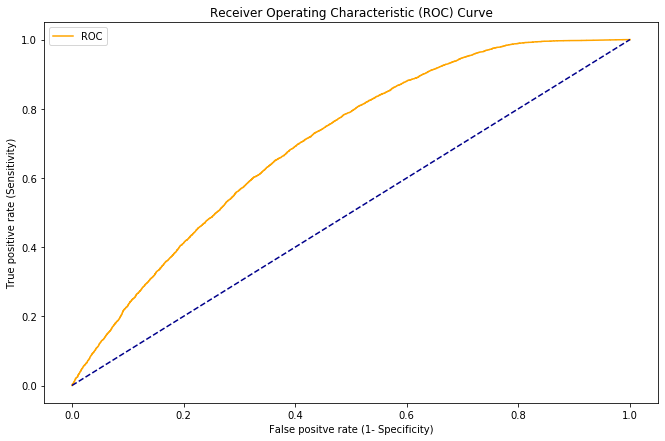


---------- EXTRATREESCLASSIFIER() --------

Confusion Matrix 
 [[7105 3559]
 [3783 5781]]
classification report:                  precision    recall  f1-score   support

           0       0.65      0.67      0.66     10664
           1       0.62      0.60      0.61      9564

    accuracy                           0.64     20228
   macro avg       0.64      0.64      0.64     20228
weighted avg       0.64      0.64      0.64     20228

PPV:  65.25532696546657
NPV:  61.895074946466806


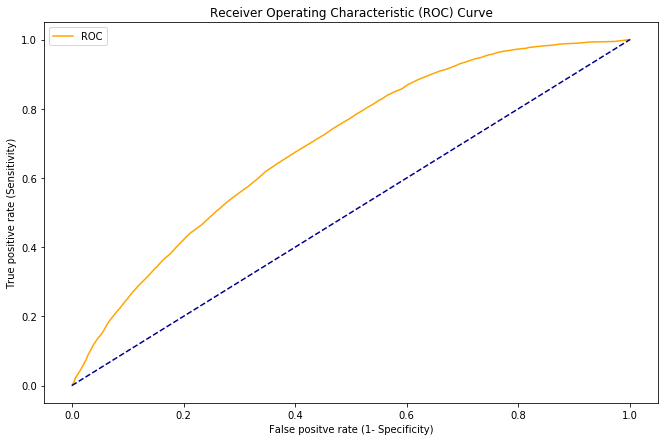


---------- GRADIENTBOOSTINGCLASSIFIER() --------

Confusion Matrix 
 [[6314 2855]
 [4574 6485]]
classification report:                  precision    recall  f1-score   support

           0       0.58      0.69      0.63      9169
           1       0.69      0.59      0.64     11059

    accuracy                           0.63     20228
   macro avg       0.64      0.64      0.63     20228
weighted avg       0.64      0.63      0.63     20228

PPV:  57.99044819985305
NPV:  69.43254817987152


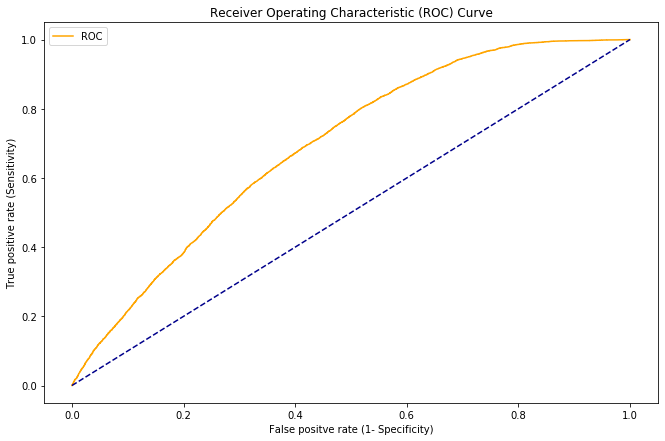

,Model_name,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,confusion matrix,Sensitivity,Specificity
0,MODEL - BA,LogisticRegression(),0.624237,0.566930,0.414454,0.583449,0.145655,0.478847,"[[7931, 5469], [2957, 3871]]",59.186567,56.693029
1,MODEL - BA,AdaBoostClassifier(),0.680572,0.581061,0.661563,0.623492,0.249936,0.618704,"[[6433, 3161], [4455, 6179]]",67.052324,58.106075
2,MODEL - BA,<catboost.core.CatBoostClassifier object at 0x...,0.704799,0.597924,0.678266,0.640844,0.284294,0.635566,"[[6628, 3005], [4260, 6335]]",68.805149,59.792355
3,MODEL - BA,RandomForestClassifier(),0.702862,0.603944,0.629550,0.638323,0.274571,0.616481,"[[7032, 3460], [3856, 5880]]",67.022493,60.394412
4,MODEL - BA,"XGBClassifier(base_score=0.5, booster=None, co...",0.701927,0.604487,0.651927,0.642327,0.284433,0.627312,"[[6904, 3251], [3984, 6089]]",67.986214,60.448724
5,MODEL - BA,ExtraTreesClassifier(),0.696610,0.604454,0.618951,0.637038,0.271042,0.611617,"[[7105, 3559], [3783, 5781]]",66.626032,60.445420
6,MODEL - BA,GradientBoostingClassifier(),0.692438,0.586400,0.694325,0.632737,0.270688,0.635815,"[[6314, 2855], [4574, 6485]]",68.862471,58.640022


In [67]:
classify('MODEL - BASE')

# Test Data

In [68]:
test = pd.read_csv('test_fashion.csv')
test.head()

,Order_Ref_Number,Order_Placed_AT,Order_Delivered_Date,Product_Ref_ID,Size,Color_Code,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID,Gender,Customer_BirthDate,Customer_Location,Customer_Joining_Date
0,75722,2016-08-20,2016-08-23,1745,13,blue,64,75.0,43916,Mrs,1975-01-31,Bavaria,2016-08-21
1,80185,2016-08-24,2016-08-28,1806,unsized,black,110,16.9,44684,Mrs,1969-12-10,Bavaria,2015-02-17
2,19865,2016-06-30,2016-08-02,22,l,green,14,19.9,34106,Mrs,1968-01-18,Thuringia,2015-02-17
3,76700,2016-08-21,2016-08-24,1683,l,blue,97,39.9,34160,Mrs,1961-03-31,Hesse,2016-03-03
4,92992,2016-09-04,2016-09-06,1500,l,petrol,11,69.9,11929,Mrs,1962-06-02,Baden-Wuerttemberg,2016-04-23


In [69]:
test.shape

(25000, 13)

In [70]:
test.describe()

,Order_Ref_Number,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Customer_ID
count,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,49993.232160,922.301640,30.07680,64.559979,27182.314200
std,28820.379008,702.069155,28.14961,47.077775,14081.984634
min,9.000000,1.000000,1.00000,0.000000,24.000000
25%,25106.500000,214.000000,5.00000,29.900000,14900.000000
50%,49898.000000,808.000000,25.00000,49.900000,31229.000000
75%,74865.250000,1578.250000,43.00000,79.900000,38911.000000
max,100000.000000,2241.000000,138.00000,399.950000,48237.000000


In [71]:
test.describe(include = 'object').T

,count,unique,top,freq
Order_Placed_AT,25000,82,2016-06-27,1387
Order_Delivered_Date,22703,115,2016-07-03,1260
Size,25000,93,l,3114
Color_Code,25000,76,black,4585
Gender,25000,5,Mrs,23815
Customer_BirthDate,22830,7008,1900-11-21,210
Customer_Location,25000,16,North Rhine-Westphalia,5742
Customer_Joining_Date,25000,568,2015-02-17,8523


## Feature Engineering 


In [73]:
test.drop('Order_Ref_Number', axis = 1, inplace = True)

In [74]:
test['Color_Code'].unique()

array(['blue', 'black', 'green', 'petrol', 'purple', 'berry', 'stained',
       'brown', 'mocca', 'white', 'nature', 'red', 'grey', 'curry',
       'ocher', 'denim', 'ash', 'turquoise', 'olive', 'anthracite',
       'beige', 'magenta', 'pink', 'fuchsia', 'striped', 'ancient',
       'dark denim', 'mahagoni', 'coral', 'aubergine', 'azure', 'navy',
       'orange', 'pallid', 'ivory', 'mango', 'basalt', 'kanel',
       'dark oliv', 'aqua', 'yellow', 'bordeaux', 'dark garnet', 'gold',
       'mint', 'ecru', 'blau', 'silver', 'hibiscus', '?', 'aquamarine',
       'champagner', 'khaki', 'brwon', 'cognac', 'floral', 'darkblue',
       'dark navy', 'habana', 'cobalt blue', 'dark grey', 'jade',
       'avocado', 'almond', 'aviator', 'ebony', 'antique pink',
       'terracotta', 'curled', 'baltic blue', 'caramel', 'apricot',
       'copper coin', 'amethyst', 'currant purple', 'creme'], dtype=object)

In [75]:
test['Color_Code'] = test['Color_Code'].replace('?', test['Color_Code'].mode()[0])

In [76]:
test.isnull().sum()

Order_Placed_AT                  0
Order_Delivered_Date          2297
Product_Ref_ID                   0
Size                             0
Color_Code                       0
Product_Category_Reference       0
Cost_to_Customer(USD)            0
Customer_ID                      0
Gender                           0
Customer_BirthDate            2170
Customer_Location                0
Customer_Joining_Date            0
dtype: int64

In [77]:
test['Order_Placed_AT'] = pd.to_datetime(test['Order_Placed_AT'])

test['Order_Delivered_Date'] = pd.to_datetime(test['Order_Delivered_Date'])

test['Customer_BirthDate'] = pd.to_datetime(test['Customer_BirthDate'])

In [78]:
test['Total_days_for_deliver'] = (test['Order_Delivered_Date'] - test['Order_Placed_AT'])
test['Total_days_for_deliver'] = test['Total_days_for_deliver']/np.timedelta64(1, 'D')
test['Total_days_for_deliver'].head()

0     3.0
1     4.0
2    33.0
3     3.0
4     2.0
Name: Total_days_for_deliver, dtype: float64

In [79]:
test['Total_days_for_deliver']

0         3.0
1         4.0
2        33.0
3         3.0
4         2.0
         ... 
24995     2.0
24996     3.0
24997     4.0
24998     2.0
24999     4.0
Name: Total_days_for_deliver, Length: 25000, dtype: float64

In [80]:
test['Total_days_for_deliver'] = test['Total_days_for_deliver'].apply(lambda x : 0 if x < 0 else x)

In [81]:
test['Total_days_for_deliver'] = test['Total_days_for_deliver'].fillna(0)

In [82]:
test = test.drop(['Order_Delivered_Date', 'Order_Placed_AT'], axis = 1)

# AGE OF CUSTOMER

In [83]:
test['Customer_BirthDate'] = test['Customer_BirthDate'].fillna(test['Customer_BirthDate'].mode()[0])

In [84]:
test['Customer_BirthDate'] = test['Customer_BirthDate'].apply(lambda x : str(x).split('-')[0]).astype(int)

In [85]:
test['age'] = 2020 - test['Customer_BirthDate']

In [86]:
test.isnull().sum()

Product_Ref_ID                0
Size                          0
Color_Code                    0
Product_Category_Reference    0
Cost_to_Customer(USD)         0
Customer_ID                   0
Gender                        0
Customer_BirthDate            0
Customer_Location             0
Customer_Joining_Date         0
Total_days_for_deliver        0
age                           0
dtype: int64

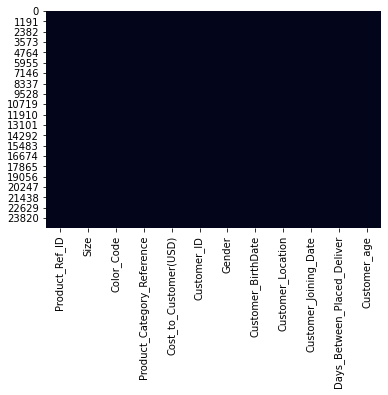

In [94]:
sns.heatmap(test.isnull(), cbar = False)
plt.show()

In [87]:
test = test.drop(['Customer_BirthDate'], axis = 1)

# DURATION OF CUSTOMER ASSOCIATED WITH THE COMPANY

In [88]:
test['Customer_Joining_Date'] = pd.to_datetime(test['Customer_Joining_Date'])

In [89]:
today = pd.to_datetime('2020-01-30')
today

Timestamp('2020-01-30 00:00:00')

In [90]:
test['cust_asso'] = today - test['Customer_Joining_Date']

In [91]:
test['cust_asso'].head()

0   1257 days
1   1808 days
2   1808 days
3   1428 days
4   1377 days
Name: cust_asso, dtype: timedelta64[ns]

In [92]:
test['cust_asso'] = test['cust_asso'].apply(lambda x : str(x).split(' ')[0]).astype('int64')

In [93]:
test['cust_asso'].head()

0    1257
1    1808
2    1808
3    1428
4    1377
Name: cust_asso, dtype: int64

In [94]:
test = test.drop(['Customer_Joining_Date', 'Customer_ID'], axis = 1)

In [95]:
test['Size'] = test['Size'].replace('12+','12')

In [96]:
test['Size'] = test['Size'].replace('2+','2')

In [97]:
test_num = test.select_dtypes(np.number)

test_cat = test.select_dtypes('object')

In [98]:
test_num.columns

Index(['Product_Ref_ID', 'Product_Category_Reference', 'Cost_to_Customer(USD)',
       'Total_days_for_deliver', 'age', 'cust_asso'],
      dtype='object')

In [99]:
test_cat.columns

Index(['Size', 'Color_Code', 'Gender', 'Customer_Location'], dtype='object')

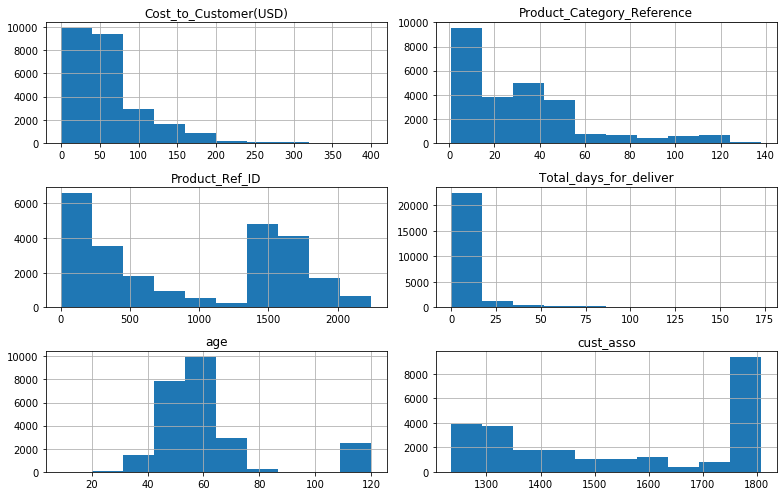

In [100]:
test_num.hist()
plt.tight_layout()
plt.show()

In [101]:
test['Cost_to_Customer(USD)'] = np.log1p(test['Cost_to_Customer(USD)'])

In [102]:
test['Product_Category_Reference'] = np.log1p(test['Product_Category_Reference'])

In [103]:
test['Product_Ref_ID'] = np.log1p(test['Product_Ref_ID'])

In [104]:
test['Total_days_for_deliver'] = np.log1p(test['Total_days_for_deliver'])

In [105]:
test['age'] = np.sqrt(test['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247DBF49288>,
      dtype=object)

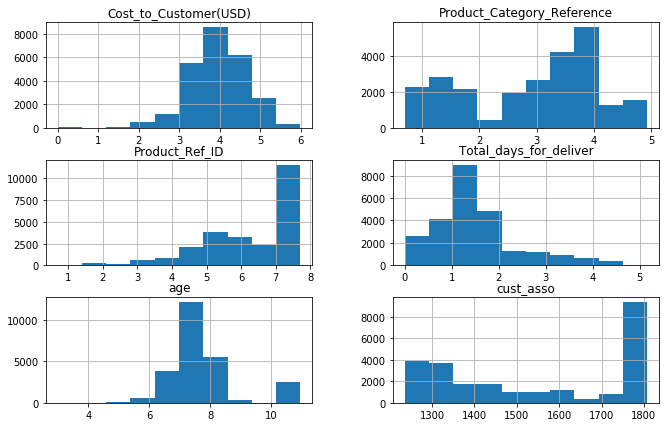

In [106]:
test.hist()

In [107]:
test_num = test.select_dtypes(np.number)

test_cat = test.select_dtypes('object')

In [108]:
ordd = OrdinalEncoder()
test_cat[test_cat.columns] = ordd.fit_transform(test_cat)

In [146]:
test_concat = pd.concat([test_num, test_cat], axis = 1)

In [147]:
X_train = pd.concat([df_num, df_cat], axis=1)

y_train = y

X_test = test_concat


In [148]:
X_train.shape

(67426, 10)

In [149]:
X_test.shape

(25000, 10)

In [150]:
train = X_train.columns
test = X_test.columns

In [151]:
from sklearn.preprocessing import StandardScaler
stdd = StandardScaler()

In [152]:
X_train = stdd.fit_transform(X_train)
X_test = stdd.fit_transform(X_test)

In [153]:
X_train = pd.DataFrame(X_train, columns = train)
X_test = pd.DataFrame(X_test, columns = test)
X_train.head()

,Product_Ref_ID,Product_Category_Reference,Cost_to_Customer(USD),Total_days_for_deliver,age,cust_asso,Size,Color_Code,Gender,Customer_Location
0,0.408884,0.532632,-1.229255,-0.754749,0.535437,1.071960,0.731250,0.380214,0.181415,-0.301396
1,0.818673,0.481131,0.768166,0.397061,0.768272,-0.093477,0.929143,1.216232,0.181415,0.166188
2,-0.424096,-1.095813,0.331153,0.397061,0.419019,-1.155317,-0.950841,0.380214,0.181415,-0.067604
3,0.763189,0.426305,0.223938,-0.754749,1.466777,1.071960,1.028089,0.380214,0.181415,0.166188
4,0.747596,-1.285375,-1.105080,-0.754749,0.186184,0.098613,0.780723,0.751778,0.181415,0.633772


In [154]:
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

Learning rate set to 0.062208
0:	learn: 0.6825344	total: 67.7ms	remaining: 1m 7s
1:	learn: 0.6735126	total: 120ms	remaining: 59.7s
2:	learn: 0.6658126	total: 200ms	remaining: 1m 6s
3:	learn: 0.6595354	total: 267ms	remaining: 1m 6s
4:	learn: 0.6537215	total: 327ms	remaining: 1m 5s
5:	learn: 0.6489754	total: 412ms	remaining: 1m 8s
6:	learn: 0.6451136	total: 500ms	remaining: 1m 10s
7:	learn: 0.6416993	total: 571ms	remaining: 1m 10s
8:	learn: 0.6385340	total: 649ms	remaining: 1m 11s
9:	learn: 0.6360620	total: 722ms	remaining: 1m 11s
10:	learn: 0.6338363	total: 777ms	remaining: 1m 9s
11:	learn: 0.6317396	total: 837ms	remaining: 1m 8s
12:	learn: 0.6300308	total: 894ms	remaining: 1m 7s
13:	learn: 0.6286412	total: 952ms	remaining: 1m 7s
14:	learn: 0.6272977	total: 997ms	remaining: 1m 5s
15:	learn: 0.6259976	total: 1.06s	remaining: 1m 4s
16:	learn: 0.6249151	total: 1.11s	remaining: 1m 4s
17:	learn: 0.6239183	total: 1.17s	remaining: 1m 3s
18:	learn: 0.6230987	total: 1.21s	remaining: 1m 2s
19:	le

In [155]:
y_pred = cat.predict(X_test)

In [156]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [157]:
testtt = pd.read_csv('test_fashion.csv')

In [158]:
final = pd.concat([testtt['Customer_ID'],pd.DataFrame(y_pred)], axis = 1)
final.columns = ['Order_Ref_Number', 'Order_Repeat_Chance']
final.head()

,Order_Ref_Number,Order_Repeat_Chance
0,43916,1
1,44684,0
2,34106,0
3,34160,0
4,11929,1


In [159]:
final.shape

(25000, 2)

In [160]:
final['Order_Repeat_Chance'].value_counts()

1    13066
0    11934
Name: Order_Repeat_Chance, dtype: int64

In [161]:
final.isnull().sum()

Order_Ref_Number       0
Order_Repeat_Chance    0
dtype: int64

In [164]:
Sowndariya = final.to_csv('final_result.csv')